# ACM41020 Mathematics of Machine Learning - Lab Exam - Autumn 2024/25

## Instructions

**Time Allowed: 1.5 hours**

- Full marks will be awarded for complete and correct answers to **all three** questions.
- Each full question carries equal marks.
- The exam must be completed individually and in-person.
- You may use the following materials:
  - Lecture notes, assignments and all materials on the Brightspace page for the module.
  - Any other hand-written notes that you have prepared.
  - Any textbooks, in either print or electronic form. This includes documentation pages for [Python](http://python.org), [cvxpy](https://www.cvxpy.org), [matplotlib](http://matplotlib.org), [numpy](http://numpy.org) and [tensorflow](http://tensorflow.org).
  - You may use a computer or calculator.
  - You may use [Google Colab](http://colab.research.google.com) for running Python notebooks.
- With the exception of the above, no other sources are allowed. In particular, you may not use web search or other web pages. You may not use ChatGPT or similar tools. You also must not discuss the exam with anyone else.
- You should answer all questions inside this notebook.
- Once the exam has finished, upload your solutions to Brightspace.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


## 1. Neural Networks

_In this question you should implement a neural network using [TensorFlow 2](https://www.tensorflow.org/) and the [Keras](https://keras.io) high level interface._

You wish to produce two neural networks that approximate the functions
$$
f(x) = \frac{1+\cos (x)}{2}, \qquad g(x) = \frac{1+\sin(50 x)}{2}
$$

1. Create training data by evaluating $f(x)$ and $g(x)$ on a grid of $101$ equally-spaced points in the range $x\in[0, 2\pi]$.

In [4]:
x_vals=np.linspace(0,2*np.pi,101)

f_vals=(1+np.cos(x_vals))/2
g_vals=(1+np.sin(50*x_vals))/2

f_training_data=list(zip(x_vals,f_vals))
g_training_data=list(zip(x_vals,g_vals))

2. Construct neural networks for the two functions with the following properties (note: scalars should be represented as vectors with a single component):
   - An input layer with an appropriate number of neurons.
   - 2 fully-connected hidden layers, each with 30 neurons and a ReLU activation function.
   - An output layer with an appropriate number of neurons and a logistic sigmoid activation function.

In [7]:
f_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1,activation='sigmoid',input_shape=(1,)),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
g_model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(1,activation='sigmoid',input_shape=(1,)),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

3. Train your networks using the training data you produced. Use the following parameters for training:
   - A mean squared error cost function.
   - Optimization using the Adam algorithm.
   - Batch size 10.
   - 200 epochs.

In [9]:
#input shape of (1,) for Keras
x_vals=x_vals.reshape(-1,1)
f_vals=f_vals.reshape(-1,1)
g_vals=g_vals.reshape(-1,1)

f_model.compile(optimizer='adam',
              loss="mse",
              )

g_model.compile(optimizer='adam',
              loss="mse",
              )

f_model.fit(x_vals,f_vals,epochs=200,batch_size=10,verbose=1)
g_model.fit(x_vals,g_vals,epochs=200,batch_size=10,verbose=1)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018  
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020     
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017     
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017     
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015     
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015     
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016     
Epoch 13/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 
Epoch 14/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 
Epoch 15/200
11/11 ━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3163e-04 
Epoch 80/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010     
Epoch 81/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9359e-04 
Epoch 82/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5831e-04 
Epoch 83/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6874e-04 
Epoch 84/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7553e-04 
Epoch 85/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 
Epoch 86/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011     
Epoch 87/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 88/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
Epoch 89/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 
Epoch 90/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3704e-04
Epoch 91/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1803e-04 
Epoch 92/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 
Epoch 93/200
11/11 ━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4183e-04 
Epoch 157/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3237e-04
Epoch 158/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5992e-04 
Epoch 159/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0256e-04 
Epoch 160/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8664e-04
Epoch 161/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 8.0217e-04
Epoch 162/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5629e-04 
Epoch 163/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2947e-04 
Epoch 164/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8128e-04 
Epoch 165/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2666e-04 
Epoch 166/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7069e-04 
Epoch 167/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010     
Epoch 168/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7141e-04 
Epoch 169/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.690

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2704e-09 
Epoch 34/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1416e-09 
Epoch 35/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8586e-09 
Epoch 36/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3306e-09 
Epoch 37/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9239e-09 
Epoch 38/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3098e-09 
Epoch 39/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5119e-09 
Epoch 40/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6319e-09 
Epoch 41/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6840e-10 
Epoch 42/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1832e-10 
Epoch 43/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9229e-10 
Epoch 44/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7803e-10 
Epoch 45/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0903e-10 
Epoch 46/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5986e-10 
Epoch

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 111/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 112/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 113/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 114/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 115/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 116/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 117/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 118/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 119/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 120/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0000e+00
Epoch 121/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 
Epoch 122/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 123/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 187/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 188/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 189/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 190/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 
Epoch 191/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 192/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 193/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 194/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 
Epoch 195/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 196/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 197/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 198/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0000e+00 
Epoch 199/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.00

4. Produce plots comparing your models against the true functions $f(x)$ and $g(x)$ over the range $x\in [0, 2\pi]$. Hint: you may find the [model.predict(x)](https://keras.io/api/models/model_training_apis/) function useful.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


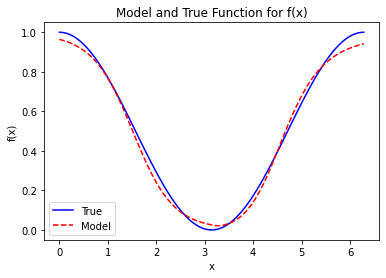

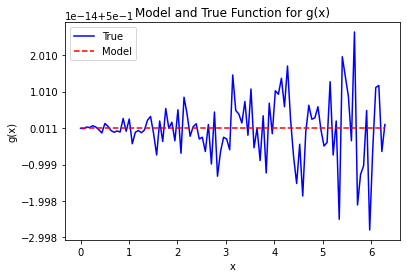

In [39]:
x_test=x_vals.reshape(-1,1)

f_true=(1+np.cos(x_test))/2
g_true=(1+np.sin(50*x_test))/2


f_pred=f_model.predict(x_test)
g_pred=g_model.predict(x_test)


plt.plot(x_test,f_true,label="True",color='blue')
plt.plot(x_test,f_pred,label="Model",color='red',linestyle='dashed')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Model and True Function for f(x)")
plt.legend()
plt.show()

plt.plot(x_test,g_true,label="True",color='blue')
plt.plot(x_test,g_pred,label="Model",color='red',linestyle='dashed')
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Model and True Function for g(x)")
plt.legend()
plt.show()

5. How would you improve the two networks? Refer specifically to the architecture of your network, the traing data you used, and/or the number of epochs you trained for in both cases.

#### 1st

The first network works very well over the 0,2pi range, and it contains plenty of neurons at 30 for each hidden layerfor this range. However extending over a large enough range, the network will not be able to capture the periodic nature properly, requiring more neurons. Over the range considered it works well but isn't perfect, to improve the network you could include more hidden layers, and especially conducting a gridsearch over hyperparameters would yield at least the same or better results.

#### 2nd

Within the range considered here we would need much more than 30 neurons, to express all the complex features of the function. Adding more neurons would eventually yield a non-straight-line function, however this new function won't generalise well to ranges outside 0,2pi and will need even more neurons in these ranges. No exact comment can be made on the amount of layers or hyperparameters, since this is completely bottleknecked by the amount of neurons, but when increasing the number of neurons, more layers should be added, and again confucting a gridsearch over hyperparameters could help.

6. Plot your model for $f(x)$ over the range $x\in[0, 4\pi]$. Give an explanation for the performance of your model in this case. How would you improve your model in this case?

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


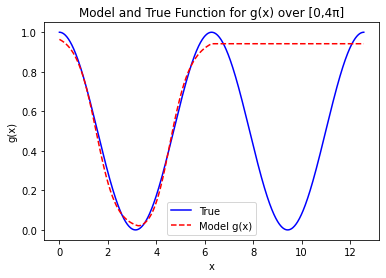

In [40]:
x_test_ext=np.linspace(0,4*np.pi,1000).reshape(-1,1)

f_true_ext=(1+np.cos(x_test_ext))/2
f_pred_ext=f_model.predict(x_test_ext)



plt.plot(x_test_ext,f_true_ext,label="True",color='blue')
plt.plot(x_test_ext,f_pred_ext,label="Model g(x)",color='red',linestyle='dashed')
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Model and True Function for g(x) over [0,4π]")
plt.legend()
plt.show()

The model's performance declines significantly outside the training range $x \in [0, 2\pi]$.

### Explanations:
1. **Training Data Used**:  
   The model was trained only on $x \in [0, 2\pi]$, so it has no knowledge of the function's behavior beyond this interval. Neural networks can learn well within the training range but can struggle to find periodic patterns accurately, therefore increasing the training range to $x \in [0, 4\pi]$ would help significantly. This is by far the biggest problem here.

2. **Similar to before**:
    Even over the range $x \in [0, 2\pi]$, you could improve the network by including more hidden layers, and especially conducting a gridsearch over hyperparameters would yield at least the same or better results.

## 2. Support Vector Machines

_In this question you should implement support vector machines using [cvxpy](https://www.cvxpy.org)._

Consider the data in the files `svm_plus.csv` and `svm_minus.csv`. This is a pair of two-dimensional datasets which are _not_ linearly separable.

1. Load the data using [numpy.genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (hint: use `delimeter=','` since it is a comma-separated values file).

In [56]:
svm_plus=np.genfromtxt('svm_plus.csv',delimiter=',')
svm_minus=np.genfromtxt('svm_minus.csv',delimiter=',')

2. Set up and solve the dual optimisation problem for a support vector machine with this dataset using a _linear kernel_. (You will find that the problem cannot be solved.)

In [57]:

X = np.vstack([svm_plus, svm_minus])
y = np.hstack([np.ones(svm_plus.shape[0]), -np.ones(svm_minus.shape[0])])


n_samples, n_features = X.shape

w = cp.Variable(n_features)
b = cp.Variable()
xi = cp.Variable(n_samples, nonneg=True)

C = 1.0


objective = cp.Minimize(0.5 * cp.norm(w, 2)**2 + C * cp.sum(xi))


constraints = [y[i] * (X[i] @ w + b) >= 1 - xi[i] for i in range(n_samples)]
constraints += [xi >= 0]

problem = cp.Problem(objective, constraints)
problem.solve()

print("Optimal weights (w):", w.value)
print("Optimal bias (b):", b.value)
w1=w.value
b1=b.value

Optimal weights (w): [-1.59999998e+00 -1.00398283e-09]
Optimal bias (b): 0.7449192774607631


Note weights approximately~0 which is not useful.

3. Modify the dual optimisation problem to include _soft margins_. Use a value $C=30$ for the regularization parameter.

In [46]:

X = np.vstack([svm_plus, svm_minus])
y = np.hstack([np.ones(svm_plus.shape[0]), -np.ones(svm_minus.shape[0])])


n_samples, n_features = X.shape

w = cp.Variable(n_features)
b = cp.Variable()
xi = cp.Variable(n_samples, nonneg=True)

C = 30.0


objective = cp.Minimize(0.5 * cp.norm(w, 2)**2 + C * cp.sum(xi))


constraints = [y[i] * (X[i] @ w + b) >= 1 - xi[i] for i in range(n_samples)]
constraints += [xi >= 0]

problem = cp.Problem(objective, constraints)
problem.solve()

print("Optimal weights (w):", w.value)
print("Optimal bias (b):", b.value)
w2=w.value
b2=b.value

Optimal weights (w): [-5.99999998  1.99999999]
Optimal bias (b): 1.9999999889672602


Meaningful weights, which are useful.

4. Set up and solve the dual optimisation problem for a support vector machine with this dataset using a _polynomial kernel_ of the form
$$
k(\mathbf{x}_1, \mathbf{x}_2) = (1 + 0.6 \mathbf{x}_1 \cdot \mathbf{x}_2)^2
$$


In [87]:
def phi(x):
    return np.array([(1+0.6*x),(1+0.6*x)])

TypeError: bad operand type for unary -: 'NoneType'

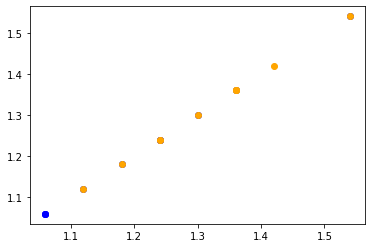

In [96]:
plus = np.array([phi(x) for x in svm_plus])
minus = np.array([phi(x) for x in svm_minus])


X_transf = np.vstack((plus, minus))
#targets
y = np.hstack([np.ones(len(svm_plus)), -1 * np.ones(len(svm_minus))])

w = cp.Variable(2)
b = cp.Variable()

# Constraints,>= 1 for + and <= -1 for -
constraints = [y[i] * (X_transf[i] @ w + b) >= 1 for i in range(len(y))]

# Objective 
objective = cp.Minimize(0.5 * cp.sum_squares(w))

# Form and solve problem
prob = cp.Problem(objective, constraints)
prob.solve()
w_val = w.value
b_val = b.value

# Data
plt.scatter(plus[:, 0], plus[:, 1], color='blue', label='Blue Circles')
plt.scatter(minus[:, 0], minus[:, 1], color='orange', label='Orange Triangles')


x_decision = -b_val / w_val[0]
plt.axvline(x_decision, color='k', label='Decision Boundary')
plt.axvline(x_decision - 1/np.abs(w_val[0]), color='r', linestyle='--', label='Margin +1')
plt.axvline(x_decision + 1/np.abs(w_val[0]), color='r', linestyle='--', label='Margin -1')


plt.xlabel(r'$\phi_1(x)$')
plt.ylabel(r'$\phi_2(x)$')
plt.title('Points on 2D grid with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

5. Create functions to evaluate the two decision rules. The functions should return a positive number for plus points and a negative number for minus points.

In [47]:
def classify_samples(test_data, w, b):
    decision_values = test_data @ w + b
    return np.sign(decision_values)


6. Plot the data along with the decision hypercurves and margins for your two support vector machines.

First

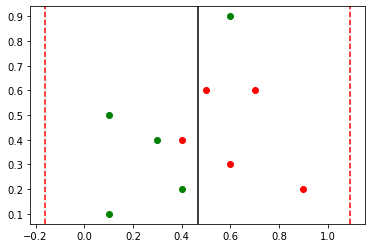

In [67]:
plt.scatter(svm_plus[:,0],svm_plus[:,1],color = 'green')
plt.scatter(svm_minus[:,0],svm_minus[:,1],color = 'red')
w_val=w1
b_val=b1
if np.isclose(w_val[1], 0, atol=1e-6):
        # w_val[1]~0
        x_decision = -b_val / w_val[0]
        plt.axvline(x_decision, color='k', label='(b) Decision Boundary')
        plt.axvline(x_decision - 1/np.abs(w_val[0]), color='r', linestyle='--', label='(b) Margin +1')
        plt.axvline(x_decision + 1/np.abs(w_val[0]), color='r', linestyle='--', label='(b) Margin -1')
else:
    # Normal
    x_vals = np.linspace(-5, 5, 100)
    decision_function = lambda x: -(w_val[0] * x + b_val) / w_val[1]
    plt.plot(x_vals, decision_function(x_vals), 'k-', label='(b) Decision Boundary')
    plt.plot(x_vals, decision_function(x_vals - 1/w_val[0]), 'r--', label='(b) Margin +1')
    plt.plot(x_vals, decision_function(x_vals + 1/w_val[0]), 'r--', label='(b) Margin -1')


Second

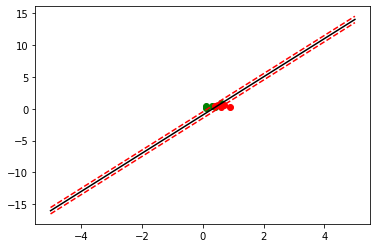

In [68]:
plt.scatter(svm_plus[:,0],svm_plus[:,1],color = 'green')
plt.scatter(svm_minus[:,0],svm_minus[:,1],color = 'red')
w_val=w2
b_val=b2
if np.isclose(w_val[1], 0, atol=1e-6):
        # w_val[1]~0
        x_decision = -b_val / w_val[0]
        plt.axvline(x_decision, color='k', label='(b) Decision Boundary')
        plt.axvline(x_decision - 1/np.abs(w_val[0]), color='r', linestyle='--', label='(b) Margin +1')
        plt.axvline(x_decision + 1/np.abs(w_val[0]), color='r', linestyle='--', label='(b) Margin -1')
else:
    # Normal
    x_vals = np.linspace(-5, 5, 100)
    decision_function = lambda x: -(w_val[0] * x + b_val) / w_val[1]
    plt.plot(x_vals, decision_function(x_vals), 'k-', label='(b) Decision Boundary')
    plt.plot(x_vals, decision_function(x_vals - 1/w_val[0]), 'r--', label='(b) Margin +1')
    plt.plot(x_vals, decision_function(x_vals + 1/w_val[0]), 'r--', label='(b) Margin -1')


7. Use your decision functions to categorise the samples in `svm_test.csv` as either "plus" or "minus". Assuming the kernel-based module correctly predicts the right class in all cases, how many points does the linear model with slack misclassify?

First

In [99]:
svm_test = pd.read_csv('svm_test.csv', header=None).values

predicted_labels1 = classify_samples(svm_test, w1, b1)

print("Test Data Predictions:")
print(predicted_labels1)

Test Data Predictions:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


2nd

In [100]:
predicted_labels2 = classify_samples(svm_test, w2, b2)


print("Test Data Predictions:")
print(predicted_labels2)

Test Data Predictions:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [102]:

y_test_np = predicted_labels1
y_pred_np = predicted_labels2
import pandas as pd
data = pd.DataFrame({
    "y_test": y_test_np,
    "y_pred": y_pred_np
})
# Add a column indicating whether the prediction is correct
data['correct'] = data['y_test'] == data['y_pred']

# Group by the true digit and calculate accuracy for each digit
accuracy_per_digit = data.groupby('y_test')['correct'].mean()

# Find digits with the highest and lowest accuracy
most_accurate = accuracy_per_digit.idxmax()
least_accurate = accuracy_per_digit.idxmin()

print("Accuracy per digit:")
print(accuracy_per_digit)


Accuracy per digit:
y_test
-1.0    0.886364
 1.0    0.939394
Name: correct, dtype: float64


## 3. Linear Regression and Principal Component Analys

Consider the data in the file `regression.csv`. Each row $i$ in the data file contains four columns of data: $x_i$, $y_i$, $z_i$, $f_i$.

In [73]:

reg_data = np.genfromtxt('regression.csv',delimiter=',')

xi = reg_data[:, 0]  
yi = reg_data[:, 1]  
zi=reg_data[:,2]
fi = reg_data[:, 3] 

1. Obtain a least-squares best fit to the data of a model of the form
$$
f(x, y, z) = a + b \,x + c\, y + d\, z.
$$
Hint: You may find it useful to use a function of the form `np.concatenate(..., axis=1)`

In [74]:
data = np.array([xi,yi,zi]).T
X = np.column_stack((np.ones_like(xi), xi, yi,zi))

# Solve for beta using the normal equation
beta = np.linalg.inv(X.T @ X) @ (X.T @ fi)

a, b, c,d = beta

print(f"Least Squares Coefficients:")
print(f"a (intercept): {a}")
print(f"b (coefficient for x): {b}")
print(f"c (coefficient for y): {c}")
print(f"d (coefficient for z): {d}")

Least Squares Coefficients:
a (intercept): 4.565339330197617
b (coefficient for x): 0.8611770731938435
c (coefficient for y): 1.9601647222089476
d (coefficient for z): 2.9912368549631942


2. Compute the errors $e_i = |f(x_i, y_i,z_i) - f_i|$ between your model and the data. Compute the norm of the error $||e||= \sqrt{\sum_i e_i^2}$.

Norm of Squared Error (e): 28.059207152129904


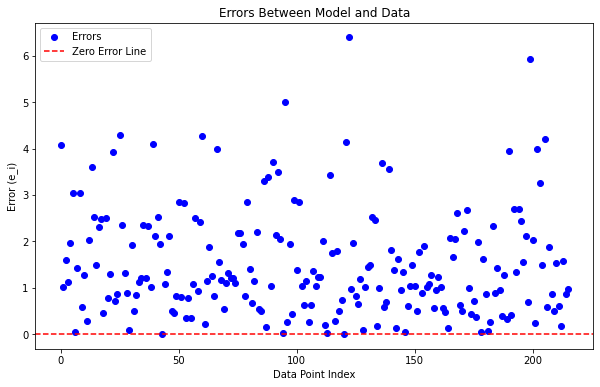

In [75]:
f_predicted=X @ beta

errors = np.abs(f_predicted - fi)
norm_squared_error = np.sqrt(np.sum(errors**2))

print(f"Norm of Squared Error (e): {norm_squared_error}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(errors)), errors, color='blue', label='Errors')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Data Point Index')
plt.ylabel('Error (e_i)')
plt.title('Errors Between Model and Data')
plt.legend()
plt.show()

3. Compute the orthogonal distance $e^\perp_i$ from the data to the 3-dimensional hypersurface defined by your model. Hint: for a hypersurface defined by $\alpha x + \beta y + \gamma z + \epsilon w = d$ the orthogonal distance of point $(x_1, y_1, z_1, w_1)$ from the hypersurface is given by
$$
e^\perp_i = \frac{|\alpha x_i + \beta y_i + \gamma z_i + \epsilon w_i -d|}{\sqrt{\alpha^2 + \beta^2 + \gamma^2 + \delta^2}}.
$$
Compute the norm $||e^{\perp} || = \sqrt{\sum_i (e^\perp_i)^2}$.

3. By considering the first three principal components, compute a fit of the same model which minimises the **orthogonal distance** from the data to the best-fit hyperplane. Your fit should produce a model of the form
$$
\hat{f}(x, y, z) = \hat{a} + \hat{b}\, x + \hat{c}\, y + \hat{d}\, z.
$$
Hint 1: First consider the fit with respect to a shifted (i.e. standardised data) coordinate system $x' = x - \bar{x}$, $y' = y - \bar{y}$ and $z' = z - \bar{z}$ and then translate back to the original coordinates.
Hint 2: One way to determine the four parameters $\hat{a}$, $\hat{b}$, $\hat{c}$ and $\hat{d}$ in your model is by writing down four linear equations that must be satisfied and solving them.

In [77]:
import numpy.linalg as npl

In [80]:
x = (xi-np.mean(xi))/np.std(xi)
y = (yi-np.mean(yi))/np.std(yi)
z = (zi-np.mean(zi))/np.std(zi)
data = np.array([x,y,z]).T
U,Svec,VT = npl.svd(data)
S = np.zeros(data.shape)
np.fill_diagonal(S,Svec)
Svec

array([14.69693846, 14.69693846, 14.69693846])

4. Compute the errors $\epsilon_i = |\hat{f}(x_i, y_i, z_i) - f_i|$ between your orthogonal model and the data. Compute the norm of the error $||\epsilon|| = \sqrt{\sum_i \epsilon_i^2}$.

In [85]:

standardized_data = np.array([x, y, z]).T


f_predicted_pca = standardized_data @ Svec


f_predicted_pca_original = np.mean(z) + f_predicted_pca * np.std(z)


errors_pca = f_predicted_pca_original - z 
norm_squared_error_pca = np.sqrt(np.sum(errors_pca**2))


print(f"Norm Squared Error (Orthogonal PCA Model): {norm_squared_error_pca:.4f}")


Norm Squared Error (Orthogonal PCA Model): 365.8346


5. Compute the orthogonal distance from the data to the 3-dimensional hypersurface defined by this second model.

In [86]:

standardized_data = np.array([x, y, z]).T


f_predicted_pca = standardized_data @ Svec


f_predicted_pca_original = np.mean(z) + f_predicted_pca * np.std(z)


errors_pca = f_predicted_pca_original - z 
norm_squared_error_pca = np.sqrt(np.sum(errors_pca**2))


print(f"Norm Squared Error (Orthogonal PCA Model): {norm_squared_error_pca:.4f}")


Norm Squared Error (Orthogonal PCA Model): 365.8346
